<a href="https://colab.research.google.com/github/jopal60/tp_info_centre/blob/main/Tp_info_centre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn 
import numpy as np 
import seaborn as sns

# Importation de nos premier Bibliotheque
## Importation de notre jeu de données à partir de notre espace local dans un dossier de chemin Mes Document/Mes Documents le fichier excel du nom de Jonathan_PALUKU_MATHE.xlsx




Step 1. Appuyer sur le bouton select. fichier

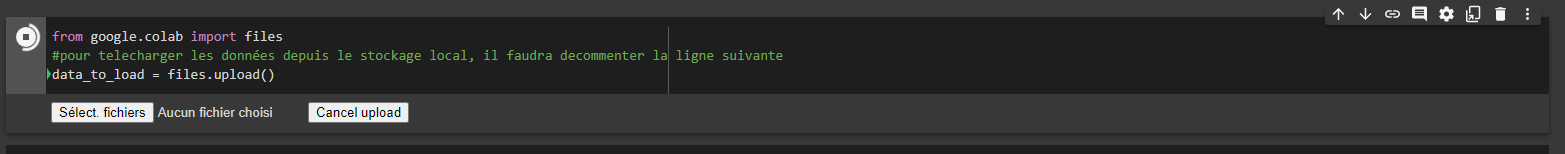

Step 2. choisir le fichier

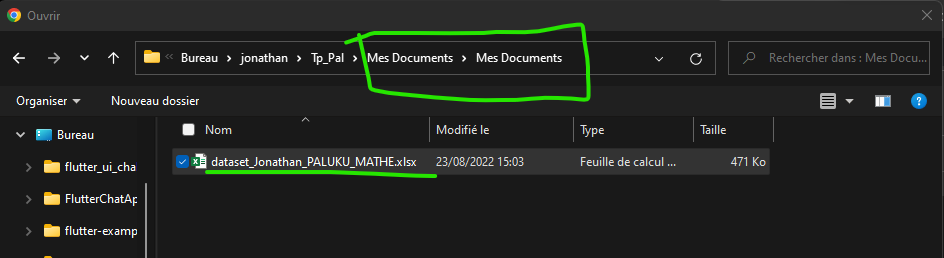

In [4]:
from google.colab import files
#pour telecharger les données depuis le stockage local, il faudra decommenter la ligne suivante
data_to_load = files.upload()

Saving dataset_jonathan_PALUKU_MATHE.xlsx to dataset_jonathan_PALUKU_MATHE.xlsx


# importation du fichier dans notre projet de machine learning 

In [6]:
import io
df = pd.read_excel(io.BytesIO(data_to_load['dataset_jonathan_PALUKU_MATHE.xlsx']))

In [7]:
df.shape  #taille de notre dataset

(6497, 13)

In [8]:
df.head()  # les entetes de notre dataset et les 5 premiers individus

,ID_individu,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [9]:
df.info() # information sur chaque colonne de notre dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID_individu           6497 non-null   int64  
 1   fixed_acidity         6497 non-null   float64
 2   volatile_acidity      6497 non-null   float64
 3   citric_acid           6497 non-null   float64
 4   residual_sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free_sulfur_dioxide   6497 non-null   float64
 7   total_sulfur_dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


# Verifiation des valeurs null pour un eventuel nettoyage de nos données

In [10]:
df.isnull().sum()

ID_individu             0
fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# (2) Afficher les caractéristiques statistiques de cet ensemble de données

---






In [11]:
df.describe()

,ID_individu,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,2042.535632,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1436.926393,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,0.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,812.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,1649.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,3273.000000,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,4897.000000,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


# (3)À l’aide de l’algorithme 𝑘-means, segmentation de l'ensemble de données en 10 classes

In [12]:
X = df #notre dataset
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=0) # choix du nombre de classes  
kmeans.fit(X) #entrainement du model

KMeans(n_clusters=10, random_state=0)

# Données non entrainées

<function matplotlib.pyplot.show(*args, **kw)>

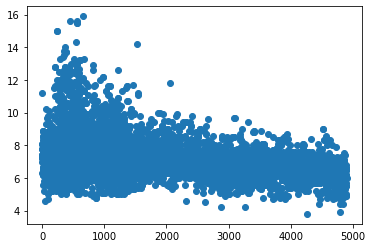

In [13]:
plt.scatter(X.values[:,0],X.values[:,1])
plt.show

In [14]:
centres=kmeans.cluster_centers_ #les centres  de chaques classes

In [15]:
df["labels"] = kmeans.labels_ #ajout d'une colonne pour trouver la classe de chaque elements

In [16]:
labels=kmeans.labels_

In [17]:
df.head(100) #affichage de 100 premier element et leur classe d'appartenance

,ID_individu,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,labels
0,0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,3
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,3
2,2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,3
3,3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,3
4,4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,7.1,0.260,0.29,12.4,0.044,62.0,240.0,0.9969,3.04,0.42,9.2,6,3
96,96,6.0,0.340,0.66,15.9,0.046,26.0,164.0,0.9979,3.14,0.50,8.8,6,3
97,97,8.6,0.265,0.36,1.2,0.034,15.0,80.0,0.9913,2.95,0.36,11.4,7,3
98,98,9.8,0.360,0.46,10.5,0.038,4.0,83.0,0.9956,2.89,0.30,10.1,4,3


In [18]:
len(np.unique(labels)) #veriification si nos avons reellement 10 classes

10

# (4)Déterminez la taille de chaque classe
## Comptage des éléments de chaque classes

In [19]:
from collections import Counter
print(Counter(labels).values())

dict_values([818, 828, 837, 835, 542, 541, 533, 528, 520, 515])


In [20]:
df.drop(['fixed_acidity','volatile_acidity',
                'citric_acid','residual_sugar','chlorides',
                'free_sulfur_dioxide','total_sulfur_dioxide','density','pH','sulphates',
                'alcohol','quality'],axis=1).groupby(['labels']).count()

,ID_individu
labels,
0,837
1,528
2,541
3,818
4,835
5,515
6,533
7,542
8,520


<function matplotlib.pyplot.show(*args, **kw)>

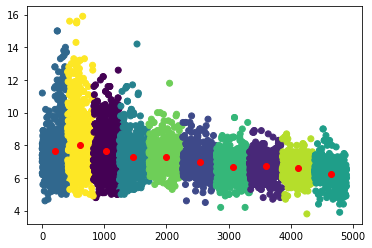

In [21]:
plt.scatter(X.values[:,0],X.values[:,1],c=labels)
plt.scatter(centres[:,0], centres[:,1],c='r')
plt.show

# utiliser l’analyse en composantes principales (ACP) pour la réduction de la dimensionnalité

In [22]:
from sklearn.decomposition import PCA
reduced_data = PCA(n_components=2).fit_transform(df) #reduction de dimension 2

In [23]:
reduced_columns=['PC'+str(c) for c in range(1, reduced_data.shape[1]+1,1)]
reduced_data=pd.DataFrame(reduced_data,index=df.index,columns=reduced_columns)
reduced_data.head()

,PC1,PC2
0,-2041.842377,77.674832
1,-2041.316146,32.886747
2,-2040.613787,2.656449
3,-2038.685995,93.169783
4,-2037.686048,93.159511


In [27]:
reduced_data #visualisation de la reduction de 10 dimention à deux

,PC1,PC2
0,-2041.842377,77.674832
1,-2041.316146,32.886747
2,-2040.613787,2.656449
3,-2038.685995,93.169783
4,-2037.686048,93.159511
...,...,...
6492,-449.217641,-64.992737
6493,-448.128390,-56.598329
6494,-447.265447,-69.579556
6495,-446.217751,-65.019975


In [28]:
data_df = pd.DataFrame(reduced_data)
data_df.head()

,PC1,PC2
0,-2041.842377,77.674832
1,-2041.316146,32.886747
2,-2040.613787,2.656449
3,-2038.685995,93.169783
4,-2037.686048,93.159511


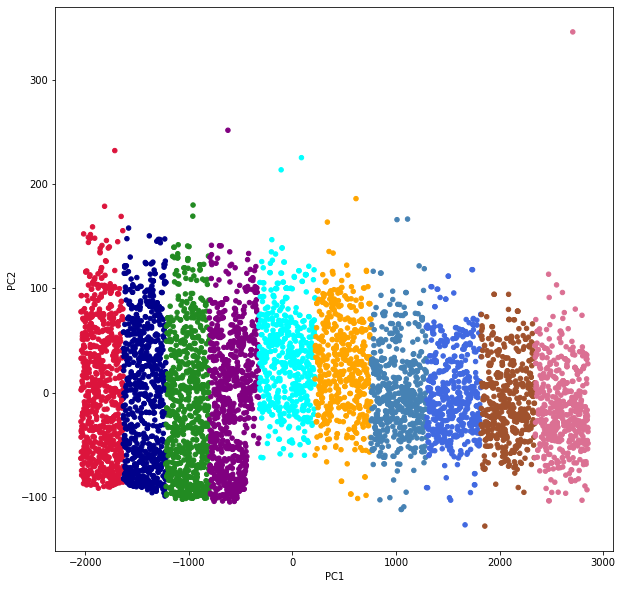

In [29]:
coleurs={0:'forestgreen',
             1:'royalblue',
             2:'orange',
             3:'crimson',
             4:'purple',
             5:'palevioletred',
             6:'steelblue',
             7:'cyan',
             8:'sienna',
             9:'darkblue'}
y_colors=[coleurs[i] for i in labels]
reduced_data.plot(x='PC1', y='PC2', kind='scatter',figsize=(10,10), color=y_colors)
plt.show()

In [30]:
data_df.describe()

,PC1,PC2
count,6.497000e+03,6497.000000
mean,1.433466e-13,0.000000
std,1.437002e+03,56.165222
min,-2.043292e+03,-128.170110
25%,-1.231270e+03,-42.243014
50%,-3.929972e+02,-2.639431
75%,1.230447e+03,40.109304
max,2.854112e+03,346.352345


In [31]:
df.drop(['fixed_acidity','volatile_acidity',
                'citric_acid','residual_sugar','chlorides',
                'free_sulfur_dioxide','total_sulfur_dioxide','density','pH','sulphates',
                'alcohol','quality'],axis=1).groupby(['labels']).describe()

ID_individu                                                             \
             count         mean         std     min      25%     50%      75%   
labels                                                                          
0            837.0  1031.751493  120.889161   822.0   927.00  1032.0  1136.00   
1            528.0  3598.500000  152.564740  3335.0  3466.75  3598.5  3730.25   
2            541.0  2531.000000  156.317519  2261.0  2396.00  2531.0  2666.00   
3            818.0   204.000000  118.140012     0.0   102.00   204.0   306.00   
4            835.0  1454.059880  127.781790  1240.0  1345.50  1450.0  1554.00   
5            515.0  4640.000000  148.811962  4383.0  4511.50  4640.0  4768.50   
6            533.0  3068.000000  154.008117  2802.0  2935.00  3068.0  3201.00   
7            542.0  1989.498155  156.609393  1718.0  1854.25  1989.5  2124.75   
8            520.0  4122.500000  150.255338  3863.0  3992.75  4122.5  4252.25   
9            828.0   615.501208  119.585484   409.0   512.00   615.5   719.00   

                
           max  
labels          
0       1242.0  
1       3862.0  
2       2801.0  
3        408.0  
4       1719.0  
5       4897.0  
6       3334.0  
7       2260.0  
8       4382.0  
9        823.0

# (7)Séparez l’ensemble de données résultant (de la segmentation) en données d’apprentissage et en données de test

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, df["labels"], test_size = 0.2, random_state=42, )

In [33]:
X_train.info

<bound method DataFrame.info of       ID_individu  fixed_acidity  volatile_acidity  citric_acid  \
1916         1916            6.6              0.25         0.36   
947           947            8.5              0.16         0.35   
877           877            6.0              0.28         0.34   
2927         2927            7.0              0.31         0.31   
6063         1165            8.5              0.44         0.50   
...           ...            ...               ...          ...   
3772         3772            6.3              0.24         0.29   
5191          293            6.9              0.36         0.25   
5226          328           13.4              0.27         0.62   
5390          492            8.9              0.40         0.51   
860           860            8.1              0.27         0.35   

      residual_sugar  chlorides  free_sulfur_dioxide  total_sulfur_dioxide  \
1916             8.1      0.045                 54.0                 180.0   
947    

In [34]:
X_test.info

<bound method DataFrame.info of       ID_individu  fixed_acidity  volatile_acidity  citric_acid  \
3103         3103            7.0              0.25         0.45   
1419         1419            7.6              0.14         0.74   
4761         4761            6.2              0.15         0.27   
4690         4690            6.7              0.16         0.32   
4032         4032            6.8              0.27         0.22   
...           ...            ...               ...          ...   
889           889            6.5              0.30         0.32   
2850         2850            6.7              0.24         0.29   
4917           19            7.9              0.32         0.51   
5198          300            7.5              0.53         0.06   
5643          745            7.3              0.51         0.18   

      residual_sugar  chlorides  free_sulfur_dioxide  total_sulfur_dioxide  \
3103             2.3      0.045                 40.0                 118.0   
1419   

# utilisez les méthodes suivantes pour construire vos modèles prédictifs :
## La régression logistique ;

In [35]:
from sklearn.linear_model import LogisticRegression
modele_logit = LogisticRegression(random_state=0, solver='liblinear', multi_class="auto")
modele_logit.fit(X_train,y_train)

LogisticRegression(random_state=0, solver='liblinear')

# Evaluation du modele logistique

In [36]:
modele_logit.score(X_test,y_test)

0.9176923076923077

In [37]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

def machine_learn(model) :
    model_pipeline = Pipeline([('ss', StandardScaler()), 
                              ('model', model)])
    fitted_model = model_pipeline.fit(X_train, y_train)
    print("Accuracy Score:", fitted_model.score(X_test, y_test))
    model_preds = fitted_model.predict(X_test)
    print(classification_report(y_test, model_preds))
    print(confusion_matrix(y_test, model_preds))

In [38]:
X_train, X_test, y_train, y_test = train_test_split(df, df["labels"], test_size = 0.2, random_state=42, )

In [39]:
machine_learn(LogisticRegression(random_state=0, solver='liblinear', multi_class="auto"))

Accuracy Score: 0.9307692307692308
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       155
           1       1.00      1.00      1.00       102
           2       1.00      0.83      0.90       103
           3       1.00      1.00      1.00       190
           4       0.85      0.88      0.87       161
           5       1.00      1.00      1.00        90
           6       0.79      0.74      0.76       125
           7       0.66      0.81      0.73        99
           8       1.00      1.00      1.00       103
           9       1.00      1.00      1.00       172

    accuracy                           0.93      1300
   macro avg       0.93      0.92      0.93      1300
weighted avg       0.94      0.93      0.93      1300

[[155   0   0   0   0   0   0   0   0   0]
 [  0 102   0   0   0   0   0   0   0   0]
 [  0   0  85   0  14   0   4   0   0   0]
 [  0   0   0 190   0   0   0   0   0   0]
 [  0   0   0   0 141   0   8  12 

In [40]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
arbre=DecisionTreeClassifier(criterion='gini')
machine_learn(arbre)

Accuracy Score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       155
           1       1.00      1.00      1.00       102
           2       1.00      1.00      1.00       103
           3       1.00      1.00      1.00       190
           4       1.00      1.00      1.00       161
           5       1.00      1.00      1.00        90
           6       1.00      1.00      1.00       125
           7       1.00      1.00      1.00        99
           8       1.00      1.00      1.00       103
           9       1.00      1.00      1.00       172

    accuracy                           1.00      1300
   macro avg       1.00      1.00      1.00      1300
weighted avg       1.00      1.00      1.00      1300

[[155   0   0   0   0   0   0   0   0   0]
 [  0 102   0   0   0   0   0   0   0   0]
 [  0   0 103   0   0   0   0   0   0   0]
 [  0   0   0 190   0   0   0   0   0   0]
 [  0   0   0   0 161   0   0   0   0   0]
 [  0 

In [51]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=100)
machine_learn(knn)

Accuracy Score: 0.8315384615384616
              precision    recall  f1-score   support

           0       0.88      0.87      0.88       155
           1       0.80      0.74      0.77       102
           2       0.65      0.77      0.71       103
           3       0.87      0.86      0.87       190
           4       0.81      0.72      0.76       161
           5       0.89      0.94      0.92        90
           6       0.78      0.78      0.78       125
           7       0.70      0.86      0.77        99
           8       0.92      0.85      0.88       103
           9       0.97      0.91      0.94       172

    accuracy                           0.83      1300
   macro avg       0.83      0.83      0.83      1300
weighted avg       0.84      0.83      0.83      1300

[[135   0   7  10   3   0   0   0   0   0]
 [  0  75  25   0   2   0   0   0   0   0]
 [  3  19  79   0   2   0   0   0   0   0]
 [ 10   0   1 164  12   0   0   0   0   3]
 [  5   0   8  15 116   0   5  11 

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [43]:
model_rx = keras.Sequential()
model_rx.add(keras.layers.Dense(units = 1, activation = 'linear'))
model_rx.compile(loss='mse', optimizer="adam")

In [44]:
model_rx.fit( X_train,y_train, epochs=10, verbose=1)

Epoch 1/10
163/163 [==============================] - 1s 2ms/step - loss: 1784158.8750
Epoch 2/10
163/163 [==============================] - 0s 2ms/step - loss: 937537.6875
Epoch 3/10
163/163 [==============================] - 0s 2ms/step - loss: 443047.1875
Epoch 4/10
163/163 [==============================] - 0s 2ms/step - loss: 188150.7969
Epoch 5/10
163/163 [==============================] - 0s 2ms/step - loss: 72945.8047
Epoch 6/10
163/163 [==============================] - 0s 2ms/step - loss: 28357.8242
Epoch 7/10
163/163 [==============================] - 0s 2ms/step - loss: 13587.2480
Epoch 8/10
163/163 [==============================] - 0s 2ms/step - loss: 9292.7686
Epoch 9/10
163/163 [==============================] - 0s 2ms/step - loss: 8033.7339
Epoch 10/10
163/163 [==============================] - 0s 1ms/step - loss: 7453.9995


In [45]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_rx = sc.fit_transform(X_train)
X_test_rx = sc.transform(X_test)

In [46]:
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

In [47]:
model = Sequential()
model.add(Dense(16, input_shape=(X_train_rx.shape[1],), activation='relu')) # input shape is (features,)
model.add(Dense(3, activation='softmax'))
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))
model.summary()

# compile the model
model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 16)                240       
                                                                 
 dense_2 (Dense)             (None, 3)                 51        
                                                                 
 dense_3 (Dense)             (None, 10)                40        
                                                                 
Total params: 331
Trainable params: 331
Non-trainable params: 0
_________________________________________________________________


In [48]:
history = model.fit(x=X_train, y=y_train, validation_data=(X_test,y_test), batch_size=100, epochs=50)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


52/52 [==============================] - 1s 7ms/step - loss: 2.2996 - accuracy: 0.1562 - val_loss: 2.2279 - val_accuracy: 0.1954
Epoch 2/50
17/52 [========>.....................] - ETA: 0s - loss: 2.2433 - accuracy: 0.1953

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


52/52 [==============================] - 0s 3ms/step - loss: 2.2339 - accuracy: 0.1955 - val_loss: 2.1965 - val_accuracy: 0.1792
Epoch 3/50
52/52 [==============================] - 0s 3ms/step - loss: 2.1987 - accuracy: 0.1959 - val_loss: 2.1531 - val_accuracy: 0.2046
Epoch 4/50
52/52 [==============================] - 0s 3ms/step - loss: 2.1657 - accuracy: 0.1978 - val_loss: 2.1320 - val_accuracy: 0.2146
Epoch 5/50
52/52 [==============================] - 0s 2ms/step - loss: 2.1395 - accuracy: 0.2013 - val_loss: 2.0992 - val_accuracy: 0.2031
Epoch 6/50
52/52 [==============================] - 0s 3ms/step - loss: 2.1115 - accuracy: 0.2059 - val_loss: 2.0706 - val_accuracy: 0.2192
Epoch 7/50
52/52 [==============================] - 0s 3ms/step - loss: 2.0872 - accuracy: 0.2072 - val_loss: 2.0483 - val_accuracy: 0.2162
Epoch 8/50
52/52 [==============================] - 0s 3ms/step - loss: 2.0710 - accuracy: 0.2078 - val_loss: 2.0321 - val_accuracy: 0.2185
Epoch 9/50
52/52 [=============

In [49]:
model.evaluate(X_test,y_test)

41/41 [==============================] - 0s 2ms/step - loss: 1.6625 - accuracy: 0.1977


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


[1.6625173091888428, 0.19769230484962463]

### discussion du model

In [63]:
from sklearn.model_selection import GridSearchCV
def Evaluation_modele(model,features,labels):
    pred=model.predict(features)
    score=model.score(X_test, y_test) # Nota: chaque modele a sa metrique
    print('Score  :', round(score,3))
    
models=[modele_logit.fit(X_train, y_train), 
        knn.fit(X_train, y_train),
        arbre.fit(X_train, y_train)]
for model in models:
    print('Model :'+str(model))
    Evaluation_modele(model,X_test, y_test)
    
    print('*'*100)

Model :LogisticRegression(random_state=0, solver='liblinear')
Score  : 0.918
****************************************************************************************************
Model :KNeighborsClassifier(n_neighbors=100)
Score  : 0.992
****************************************************************************************************
Model :DecisionTreeClassifier()
Score  : 1.0
****************************************************************************************************
